# Imports

In [1]:
!pip install scikit-fuzzy
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 495 µs (started: 2023-01-03 19:33:45 +00:00)


In [2]:
import numpy as np
import math
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import statistics
from numpy.random import default_rng

time: 273 ms (started: 2023-01-03 19:33:45 +00:00)


# Antecednets (Inputs) and Consequents (Outputs)

In [3]:
quality = ctrl.Antecedent(np.arange(0,101, 1), 'quality')
population_diversity = ctrl.Antecedent(np.arange(0,101,1),'population_diversity')

time: 4.37 ms (started: 2023-01-03 19:33:45 +00:00)


In [4]:
percentage = ctrl.Consequent(np.arange(0,101,1),'percentage')

time: 709 µs (started: 2023-01-03 19:33:45 +00:00)


# Membership Function

In [5]:
quality.automf(5,names=['very bad','bad','average','good', 'very good'])

population_diversity.automf(5,names=['very bad','bad','average','good', 'very good'])

time: 5.63 ms (started: 2023-01-03 19:33:45 +00:00)


In [6]:
percentage.automf(5,names=['very low','low','average','high', 'very high'])

time: 2.58 ms (started: 2023-01-03 19:33:45 +00:00)


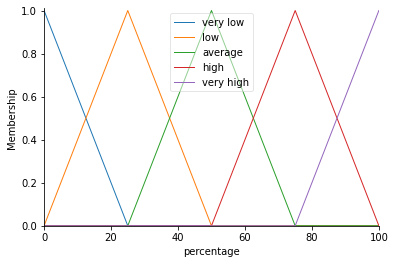

time: 462 ms (started: 2023-01-03 19:33:45 +00:00)


In [7]:
percentage.view()

In [8]:
rule1 = ctrl.Rule(quality['very bad'] & population_diversity['bad'], percentage['very high'])
rule2 = ctrl.Rule(quality['very bad'] & population_diversity['average'], percentage['very high'])
rule3 = ctrl.Rule(quality['very bad'] & population_diversity['good'], percentage['very high'])
rule4 = ctrl.Rule(quality['very bad'] & population_diversity['very good'], percentage['very high'])
rule5 = ctrl.Rule(quality['very bad'] & population_diversity['very bad'], percentage['very high'])

rule6 = ctrl.Rule(quality['bad'] & population_diversity['bad'], percentage['high'])
rule7 = ctrl.Rule(quality['bad'] & population_diversity['average'], percentage['high'])
rule8 = ctrl.Rule(quality['bad'] & population_diversity['good'], percentage['average'])
rule9 = ctrl.Rule(quality['bad'] & population_diversity['very good'], percentage['low'])
rule10 = ctrl.Rule(quality['bad'] & population_diversity['very bad'], percentage['high'])

rule11 = ctrl.Rule(quality['average'] & population_diversity['bad'], percentage['high'])
rule12 = ctrl.Rule(quality['average'] & population_diversity['average'], percentage['average'])
rule13 = ctrl.Rule(quality['average'] & population_diversity['good'], percentage['average'])
rule14 = ctrl.Rule(quality['average'] & population_diversity['very good'], percentage['low'])
rule15 = ctrl.Rule(quality['average'] & population_diversity['very bad'], percentage['high'])

rule16 = ctrl.Rule(quality['good'] & population_diversity['bad'], percentage['high'])
rule17 = ctrl.Rule(quality['good'] & population_diversity['average'], percentage['low'])
rule18 = ctrl.Rule(quality['good'] & population_diversity['good'], percentage['low'])
rule19 = ctrl.Rule(quality['good'] & population_diversity['very bad'], percentage['low'])
rule20 = ctrl.Rule(quality['good'] & population_diversity['very good'], percentage['very low'])

rule21 = ctrl.Rule(quality['very good'] & population_diversity['bad'], percentage['very low'])
rule22 = ctrl.Rule(quality['very good'] & population_diversity['average'], percentage['very low'])
rule23 = ctrl.Rule(quality['very good'] & population_diversity['good'], percentage['very low'])
rule24 = ctrl.Rule(quality['very good'] & population_diversity['very good'], percentage['very low'])
rule25 = ctrl.Rule(quality['very good'] & population_diversity['very bad'], percentage['very low'])

time: 15.6 ms (started: 2023-01-03 19:33:46 +00:00)


In [9]:
system_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11 ,rule12 ,rule13 ,rule14 ,rule15, rule16
                                     , rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

time: 212 ms (started: 2023-01-03 19:33:46 +00:00)


In [10]:
system = ctrl.ControlSystemSimulation(system_control)

time: 840 µs (started: 2023-01-03 19:33:46 +00:00)


In [11]:
system.input['quality'] = 100
system.input['population_diversity'] = 100
system.compute()

time: 20.7 ms (started: 2023-01-03 19:33:46 +00:00)


8.333333333333332


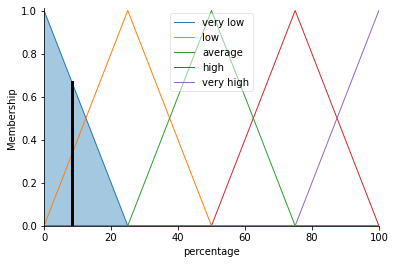

time: 282 ms (started: 2023-01-03 19:33:46 +00:00)


In [12]:
print(system.output['percentage'])
percentage.view(sim=system)

# Variaveis Globais

In [13]:
POPULATION = []
NEW_POPULATION = []
length_population = 100
length_chromosome = 12
rate_crossover = 90
MinLT = 1
MaxLT = 3

time: 970 µs (started: 2023-01-03 19:33:46 +00:00)


# Classes

In [14]:
class Chromosome:
  score = 0
  idade = 0
  tempo_vida = 0
  
  def __init__(self,schema):
    self.schema = schema
  
  def __str__(self):
    toString = ''
    for ind in self.schema:
      toString += ind  
    return toString

time: 1.21 ms (started: 2023-01-03 19:33:46 +00:00)


# Selection

In [15]:
def avaregePopulation(population):
  sum = 0
  for i in population:
    sum += i.score
  
  if sum == 0:
    return 0
  else:
    return sum/ len(population)

time: 1.02 ms (started: 2023-01-03 19:33:46 +00:00)


In [16]:
def tempoVidaMedio(population):
  sum = 0
  for i in population:
    sum += i.tempo_vida
  
  return sum/ len(population)

time: 787 µs (started: 2023-01-03 19:33:46 +00:00)


In [17]:
def minFuc(n , score, mediaPopulation):
  p = MinLT + round(n * (score/mediaPopulation))
  return p

time: 846 µs (started: 2023-01-03 19:33:46 +00:00)


In [18]:
def vida(popu):
  n = tempoVidaMedio(popu)
  mediaPopulation = avaregePopulation(popu)

  for cromo in popu:
    # print("Entrei aqui")
    res = minFuc(n,cromo.score, mediaPopulation)
    # print(type(res))
    cromo.tempo_vida = min(res, MaxLT)

time: 1.11 ms (started: 2023-01-03 19:33:46 +00:00)


In [19]:
def selection(population, new_population):

  result = []
  merged_list = []
  merged_list.extend(population)
  merged_list.extend(new_population)

  for ind in merged_list:
    if ind.idade < ind.tempo_vida:
      result.append(ind)

  result.sort(key=lambda schema: schema.score, reverse = True)

  return result

time: 1.56 ms (started: 2023-01-03 19:33:46 +00:00)


# MUTACAO

In [20]:
def population_diversity():
  array_population = []
  for i in POPULATION:
    array_population.append(str(i))
  
  return (len(set(array_population))/len(POPULATION))*100

time: 1.03 ms (started: 2023-01-03 19:33:46 +00:00)


In [21]:
def mutation(population):
  array = []
  PD = population_diversity()

  for ind in population:
    array_2 = []
    
    fitnees = (ind.score * 100) / length_chromosome
    system.input['quality'] = fitnees  # torna em porcentagem
    system.input['population_diversity'] = PD
    system.compute()
    percentage_mutation = system.output['percentage']

    for i,ind_schema in enumerate(ind.schema):
      yes = np.random.randint(0,100)
      if yes <= percentage_mutation:
        if ind_schema == '0':
          array_2.append('1')
        elif ind_schema == '1':
          array_2.append('0')
      else:
        array_2.append(ind_schema)
  
    array.append(Chromosome(array_2))

  return array

time: 4.23 ms (started: 2023-01-03 19:33:46 +00:00)


# CrossOver

In [22]:
def topParents(population):
  population.sort(key=lambda schema: schema.score, reverse = True)
  re = []

  for ind in population:
    re.append(ind.schema)

  return re[:25]

time: 1.58 ms (started: 2023-01-03 19:33:46 +00:00)


In [23]:
def crossOver(population):
  parents = topParents(population)
  # print(len(parents))

  while len(NEW_POPULATION) < length_population:
    father = parents[np.random.randint(0,len(parents))]
    mother = parents[np.random.randint(0,len(parents))]   
    
    probability_crossover = np.random.randint(0,100)

    if probability_crossover <= rate_crossover:
      if father != mother:
        child = []
        cut = np.random.randint(1,length_chromosome)
        child.append(father[:cut] + mother[cut:])
        child.append(mother[:cut] + father[cut:])
        
        for downward in child: 
          NEW_POPULATION.append(Chromosome(downward))

time: 1.79 ms (started: 2023-01-03 19:33:46 +00:00)


# Score

In [24]:
def score(population_test):
  for ind in population_test:
    ind.score= ind.schema.count('1')

time: 760 µs (started: 2023-01-03 19:33:47 +00:00)


# Iniciar Populacao

In [25]:
def random(): 
  array2 = []

  rng = default_rng()
  numbers = rng.choice(range(0, 2), size= 2, replace=False)
  
  array2.append(str(numbers[0]))
  array2.append(str(numbers[1]))
  
  return array2

time: 1.32 ms (started: 2023-01-03 19:33:47 +00:00)


In [26]:
def init_population():
  for _ in range(length_population):
    array = []
    for _ in range(int(length_chromosome/2)):
      array.extend(random())
    POPULATION.append(Chromosome(array))

time: 1.1 ms (started: 2023-01-03 19:33:47 +00:00)


# Main

In [27]:
count = 0
array_geracao = []
list_more_adaptado = []
array_diversidade = []

while count < 1:
  flag = False
  generation = 0
  POPULATION.clear()
  NEW_POPULATION.clear()
  init_population()
  score(POPULATION)
  vida(POPULATION)

  while True:
    score(POPULATION)
    array_diversidade.append(population_diversity())
    crossOver(POPULATION)
    score(NEW_POPULATION)
    NEW_POPULATION = mutation(NEW_POPULATION)
    score(NEW_POPULATION)
    vida(NEW_POPULATION)
    POPULATION = selection(POPULATION,NEW_POPULATION)
    NEW_POPULATION.clear()
    
    if POPULATION[0].score == length_chromosome:
      flag = True
    
    for ind in POPULATION:
      ind.idade += 1

    list_more_adaptado.append(POPULATION[0].score)

    if flag:
      print("===================================================================")
      print(f'Individuo: {POPULATION[0].schema} e o score dele {POPULATION[0].score} geracao {generation}')
      print("===================================================================")
      array_geracao.append(generation)
      break
      
    generation += 1
  count += 1
  
# print(f'media das 100 geracao {statistics.mean(array_geracao)}')

Individuo: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1'] e o score dele 12 geracao 3
time: 170 ms (started: 2023-01-03 19:33:47 +00:00)


In [28]:
print(array_geracao)

[3]
time: 641 µs (started: 2023-01-03 19:33:47 +00:00)


In [29]:
# print(list_more_adaptado)

time: 385 µs (started: 2023-01-03 19:33:47 +00:00)


In [30]:
print(array_diversidade)

[57.99999999999999, 76.5, 95.0, 91.0]
time: 571 µs (started: 2023-01-03 19:33:47 +00:00)
